# Task 6.6 Sourcing & Analyzing Time Series Data

## This Script Contains:
- Importing Libraries and Dataframe
- Subsetting, Wrangling, & Cleaning Time-series Data
    - Context
- Time-series analysis: decomposition
    - EVALUATION
- Testing for stationarity
    - EVALUATION
- Stationarizing the Data

### Importing Libraries & Dataframe

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# Defining path
path = r'/Users/ColinLynt/Documents/CareerFoundry/01-22 Crime Data Analysis'

In [3]:
# Importing homicide report data
df_hr = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'Homicide_df.pkl'))

In [4]:
# Setting max rows/columns to see 50 rows/columns
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [5]:
# Checking imported dataframe
df_hr.head()

,City,State,Agency,Agentype,Solved,Year,Month,ActionType,Homicide,Situation,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,Circumstance,VicCount,OffCount
0,"Autauga, AL",Alabama,Autauga County,Sheriff,No,1976,September,Normal update,Murder and non-negligent manslaughter,Single victim/unknown offender(s),30.0,Male,Black,Unknown or not reported,31.138045,Unknown,Unknown,Unknown or not reported,Other or type unknown,Relationship not determined,Other,0,0
1,"Autauga, AL",Alabama,Autauga County,Sheriff,Yes,1977,January,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,65.0,Female,Black,Unknown or not reported,62.000000,Male,Black,Unknown or not reported,Other or type unknown,Acquaintance,Brawl due to influence of alcohol,0,0
2,"Autauga, AL",Alabama,Autauga County,Sheriff,Yes,1977,March,Normal update,Murder and non-negligent manslaughter,Single victim/multiple offenders,48.0,Male,White,Unknown or not reported,52.000000,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Acquaintance,Other arguments,0,1
3,"Autauga, AL",Alabama,Prattville,Municipal police,Yes,1977,March,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,27.0,Male,Black,Unknown or not reported,22.000000,Female,Black,Unknown or not reported,Shotgun,Husband,Other arguments,0,0
4,"Autauga, AL",Alabama,Autauga County,Sheriff,Yes,1977,August,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,17.0,Female,Black,Unknown or not reported,21.000000,Male,Black,Unknown or not reported,Knife or cutting instrument,Acquaintance,Circumstances undetermined,0,0


### Subsetting, Wrangling, & Cleaning Time-series Data

##### CONTEXT: 
Since the start of unit six, I've wanted to compare the number of homicide incidents in a time series analysis. This analysis would show any trends in homicide rates throughout the years. So, I decided to condense my month and year columns into a singular date column. From there, I created a new data frame compiling all homicide incidents per month over several years. 

In [6]:
# Assigning numerical values for months of the year
def nmonth (row):
    if row['Month'] == 'January':
        return '01'
    elif row ['Month'] == 'February':
        return '02'
    elif row ['Month'] == 'March':
        return '03'
    elif row ['Month'] == 'April':
        return '04'
    elif row ['Month'] == 'May':
        return '05'
    elif row ['Month'] == 'June':
        return '06'
    elif row ['Month'] == 'July':
        return '07'
    elif row ['Month'] == 'August':
        return '08'
    elif row ['Month'] == 'September':
        return '09'
    elif row ['Month'] == 'October':
        return '10'
    elif row ['Month'] == 'November':
        return '11'
    elif row ['Month'] == 'December':
        return '12'

In [7]:
# Adding new column for numerical months of the year
df_hr['NMonth'] = df_hr.apply(lambda row : nmonth(row), axis = 1)

In [8]:
# Checking what data type NMonths is
df_hr.dtypes

City             object
State            object
Agency           object
Agentype         object
Solved           object
Year              int64
Month            object
ActionType       object
Homicide         object
Situation        object
VicAge          float64
VicSex           object
VicRace          object
VicEthnic        object
OffAge          float64
OffSex           object
OffRace          object
OffEthnic        object
Weapon           object
Relationship     object
Circumstance     object
VicCount          int64
OffCount          int64
NMonth           object
dtype: object

In [9]:
# Changing datatype of NMonth to int64
df_hr['NMonth'] = df_hr['NMonth'].astype('int64')

In [16]:
# Concatenating two int64 values to make complete date 
df_hr['Date'] = df_hr['Year'].map(str) + '-' + df_hr['NMonth'].map(str)

In [24]:
# Checking the Date column
df_hr.head(20)

,City,State,Agency,Agentype,Solved,Year,Month,ActionType,Homicide,Situation,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,Circumstance,VicCount,OffCount,NMonth,Date
0,"Autauga, AL",Alabama,Autauga County,Sheriff,No,1976,September,Normal update,Murder and non-negligent manslaughter,Single victim/unknown offender(s),30.00000,Male,Black,Unknown or not reported,31.138045,Unknown,Unknown,Unknown or not reported,Other or type unknown,Relationship not determined,Other,0,0,9,1976-9
1,"Autauga, AL",Alabama,Autauga County,Sheriff,Yes,1977,January,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,65.00000,Female,Black,Unknown or not reported,62.000000,Male,Black,Unknown or not reported,Other or type unknown,Acquaintance,Brawl due to influence of alcohol,0,0,1,1977-1
2,"Autauga, AL",Alabama,Autauga County,Sheriff,Yes,1977,March,Normal update,Murder and non-negligent manslaughter,Single victim/multiple offenders,48.00000,Male,White,Unknown or not reported,52.000000,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Acquaintance,Other arguments,0,1,3,1977-3
3,"Autauga, AL",Alabama,Prattville,Municipal police,Yes,1977,March,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,27.00000,Male,Black,Unknown or not reported,22.000000,Female,Black,Unknown or not reported,Shotgun,Husband,Other arguments,0,0,3,1977-3
4,"Autauga, AL",Alabama,Autauga County,Sheriff,Yes,1977,August,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,17.00000,Female,Black,Unknown or not reported,21.000000,Male,Black,Unknown or not reported,Knife or cutting instrument,Acquaintance,Circumstances undetermined,0,0,8,1977-8
5,"Autauga, AL",Alabama,Autauga County,Sheriff,Yes,1977,October,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,62.00000,Male,Asian,Unknown or not reported,80.000000,Male,Black,Unknown or not reported,Shotgun,Stranger,Robbery,0,0,10,1977-10
6,"Autauga, AL",Alabama,Autauga County,Sheriff,Yes,1978,May,Normal update,Murder and non-negligent manslaughter,Single victim/multiple offenders,54.00000,Male,Black,Unknown or not reported,54.000000,Female,Black,Unknown or not reported,Knife or cutting instrument,Husband,Circumstances undetermined,0,2,5,1978-5
7,"Autauga, AL",Alabama,Autauga County,Sheriff,Yes,1978,December,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,48.00000,Female,White,Unknown or not reported,26.000000,Male,White,Unknown or not reported,"Blunt object - hammer, club, etc",Acquaintance,Other,0,0,12,1978-12
8,"Autauga, AL",Alabama,Autauga County,Sheriff,No,1979,February,Normal update,Murder and non-negligent manslaughter,Single victim/unknown offender(s),33.04365,Female,Unknown,Unknown or not reported,31.138045,Unknown,Unknown,Unknown or not reported,Other or type unknown,Relationship not determined,Circumstances undetermined,0,0,2,1979-2
9,"Autauga, AL",Alabama,Prattville,Municipal police,Yes,1979,December,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,51.00000,Male,Black,Unknown or not reported,24.000000,Female,Black,Unknown or not reported,Knife or cutting instrument,Common-law husband,Other arguments,0,0,12,1979-12


In [29]:
# Creating new df based on incident counts by months and years
df_iy = pd.DataFrame(df_hr.Date.value_counts().reset_index().values, columns = ['Date', 'Incident_Count'])
df_iyindex = df_iy.sort_index(axis = 0, ascending = True)
df_iyindex

,Date,Incident_Count
0,1992-12,2602
1,1980-8,2358
2,1993-8,2227
3,1993-7,2195
4,1980-7,2163
...,...,...
535,2012-2,998
536,2013-2,991
537,2010-2,972
538,2014-2,954


In [32]:
# Set the "Date" column as the index

from datetime import datetime

df_iy['datetime'] = pd.to_datetime(df_iy['Date']) # Create a datetime column from "Date.""
df_iy = df_iy.set_index('datetime') # Set the datetime as the index of the dataframe.
df_iy.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
df_iy.head()

,Incident_Count
datetime,
1992-12-01,2602
1980-08-01,2358
1993-08-01,2227
1993-07-01,2195
1980-07-01,2163


In [36]:
df_iy = df_iy.sort_values(by = 'datetime')

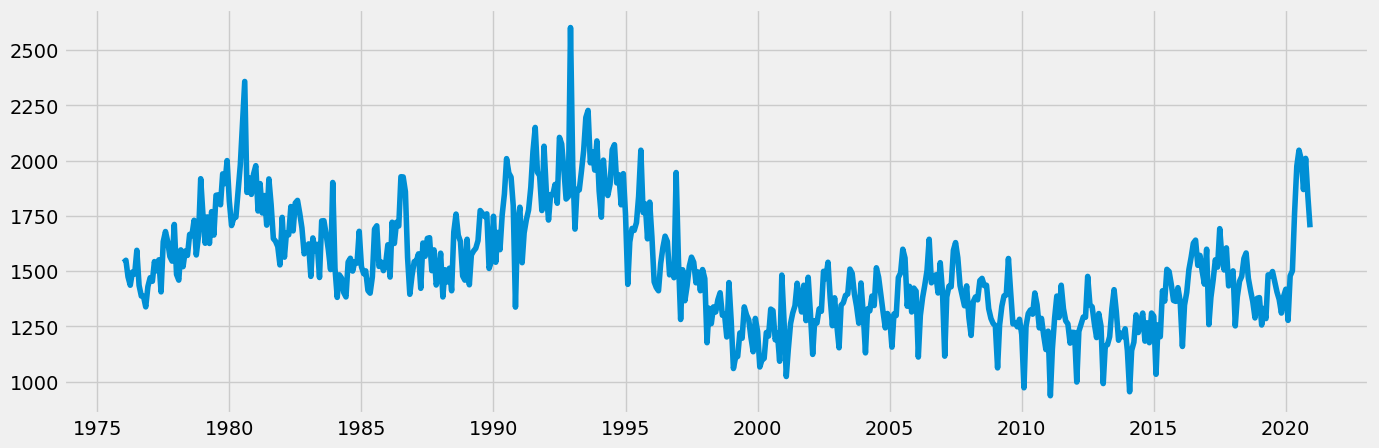

In [37]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_iy)

In [38]:
# Checking for missing values
df_iy.isnull().sum()

Incident_Count    0
dtype: int64

In [39]:
# Check for duplicates
dups = df_iy.duplicated()
dups.sum()
# Reasonable to assume multiple months could have the exact same number of incidents, dups justified.

142

### Time-series analysis: decomposition

In [47]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df_iy, model='additive')

In [48]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

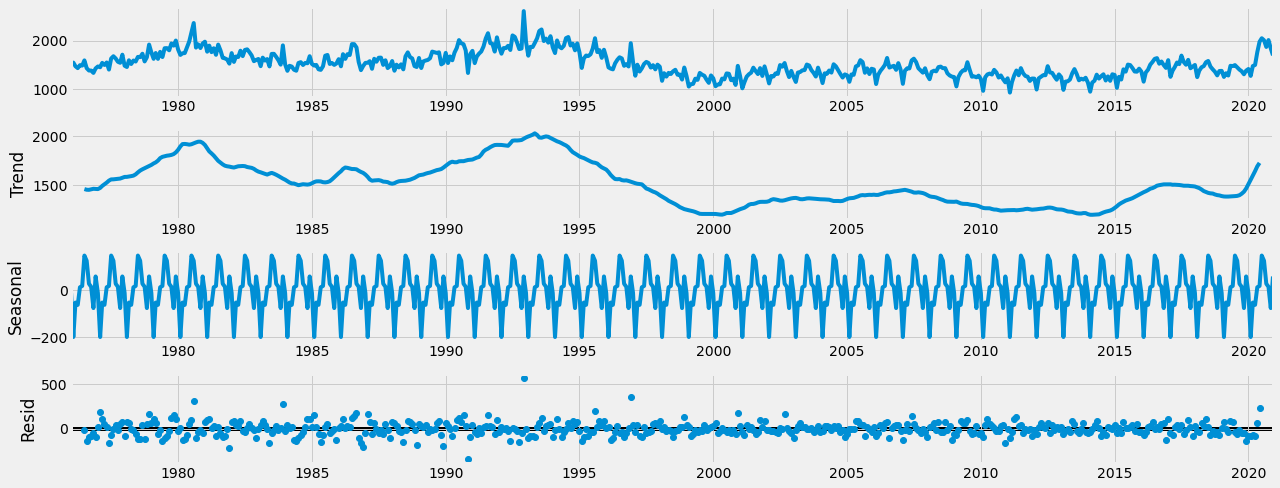

In [49]:
# Plotting the separate components, Trend, Seasonality, & Noise

decomposition.plot()
plt.show()

##### EVALUATION: 
 Lastly is the noise chart or residual chart. It represents the data that's left after the trend and seasonality have been extracted and demonstrates how smooth the data is. As we can tell, there isn't much unexplained noise here as most of the dots follow close to the trend line. However, there are a couple of extreme dots that like the one at 1993/1994.

### Testing for stationarity

In [52]:
# Running the Dickey-Fuller test to check for unit root - random jumps in data
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    
    # Performing the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(df_iy['Incident_Count'])


Dickey-Fuller Stationarity test:
Test Statistic                  -2.143070
p-value                          0.227552
Number of Lags Used             17.000000
Number of Observations Used    522.000000
Critical Value (1%)             -3.442940
Critical Value (5%)             -2.867093
Critical Value (10%)            -2.569727
dtype: float64


##### EVALUATION: 
My Test Statistic value, -2.143070, is higher than my Critical Value (5%) -2.867093. Therefore, I cannot reject the null hypothesis. These values indicate I have a unit root within my data and that my data is considered non-stationary.

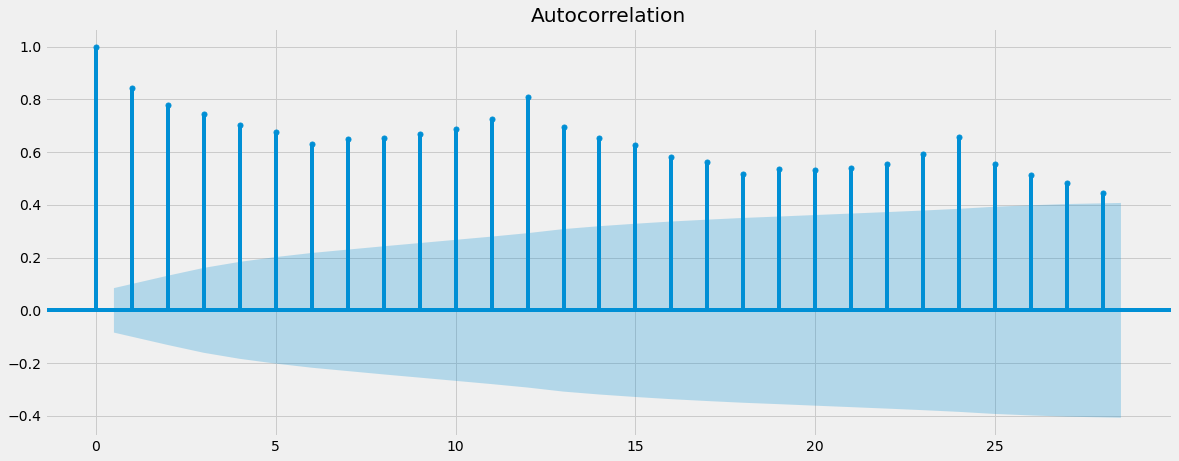

In [53]:
# Checking plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_iy)
plt.show()

### Stationarizing the Data

In [54]:
# Data Shifting df_iy by one in new dataframe data_diff in an effort to smooth out data
data_diff = df_iy - df_iy.shift(1)

In [55]:
# Removing any missing values
data_diff.dropna(inplace = True)

In [56]:
# Checking columns in data_diff
data_diff.head()

,Incident_Count
datetime,
1976-02-01,10
1976-03-01,-75
1976-04-01,-38
1976-05-01,60
1976-06-01,-9


In [57]:
# Checking columns in data_diff 
data_diff.columns

Index(['Incident_Count'], dtype='object')

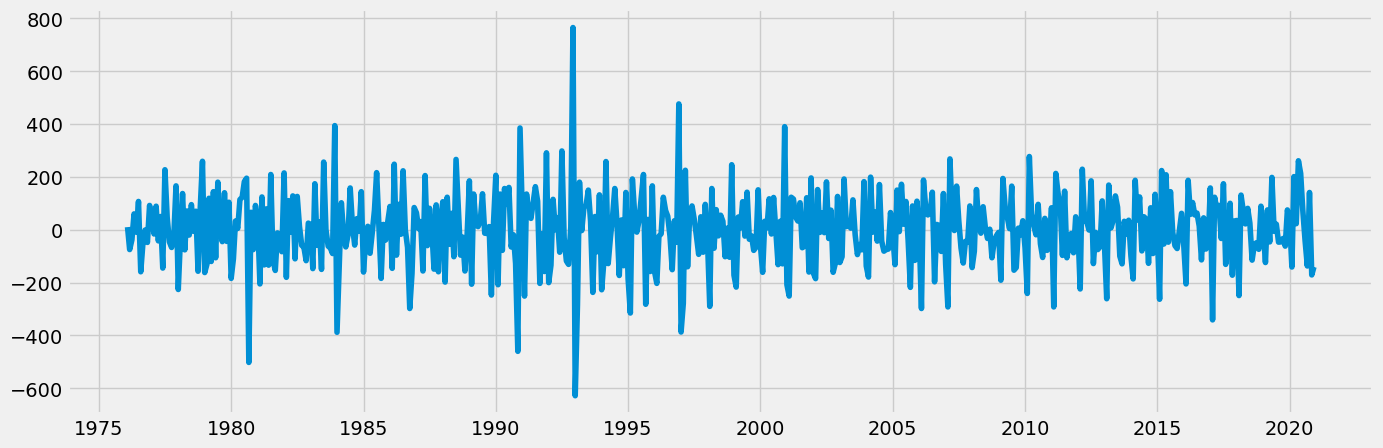

In [58]:
# Plotting diff_data
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [59]:
# Running the Dickey-Fuller test to check for unit root - random jumps in data_diff
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -3.920977
p-value                          0.001886
Number of Lags Used             16.000000
Number of Observations Used    522.000000
Critical Value (1%)             -3.442940
Critical Value (5%)             -2.867093
Critical Value (10%)            -2.569727
dtype: float64


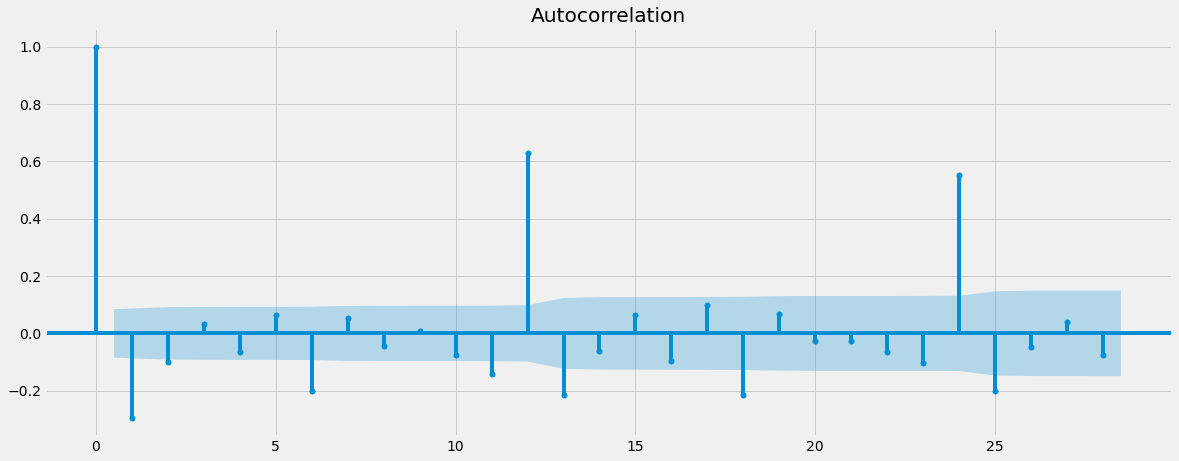

In [60]:
# Checking plot of autocorrelations within data_diff
plot_acf(data_diff)
plt.show()